In [72]:
class Value:
    def __init__(self, data, children=(), op='', label=''):
        self.data = data
        self.label = label
        self.grad = 0.0
        self.op = op
        self.prev = set(children)

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(data = self.data + other.data, children = (self, other), op='+')
        return out

    def __sub__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(data = self.data - other.data, children = (self, other), op='-')
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(data = self.data * other.data, children = (self, other), op='*')
        return out

    def __div__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(data = self.data / other.data, children = (self, other), op='/')
        return out

    def __radd__(self, other):
        return self + other
    
    def __rsub__(self, other):
        return self - other

    def __rmul__(self, other):
        return self * other

    def __rdiv__(self, other):
        return self / other

In [73]:
k = Value(5, label='k')
x = Value(10, label='x')

a = k - x; a.label = 'a'
d = a * 1; d.label = 'd'

In [75]:
def trace(root):

    nodes, edges = set(), set()

    def build(node: Value):
        if node not in nodes:
            nodes.add(node)
            for child in node.prev:
                edges.add((child, node))
                build(child)      
    build(root)
    return nodes, edges

In [76]:
def draw(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape = 'record')

        if n.op:
            dot.node(name = uid + n.op, label=n.op)
            dot.edge(uid + n.op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)

    return dot

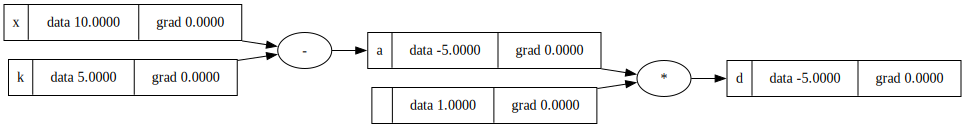

In [77]:
draw(d)

In [78]:
a = Value(data=5, label='a')
b = Value(data=4, label='b')
c = Value(data=3, label='c')
d = Value(data=2, label='d')

ab = a * b; ab.label = 'a*b'
e = ab + c; e.label = 'e'
f = e * d; f.label = 'f'

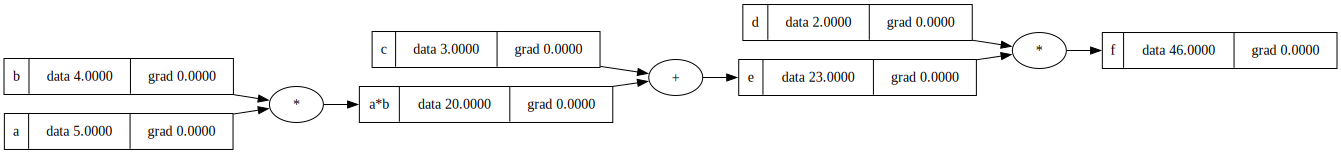

In [79]:
draw(f)

In [82]:
a.data -= 0.01 * a.grad
b.data -= 0.01 * b.grad
c.data -= 0.01 * c.grad
d.data -= 0.01 * d.grad

ab = a * b
e = ab + c
f = e * d

In [83]:
f

Value(data=46.0)

In [81]:
def test():

    h = 0.0001

    a = 5
    b = 4
    c = 3
    d = 2

    ab = a * b
    e = ab + c
    f1 = e * d

    ab = a * b
    e = ab + c
    f2 = e * (d + h)

    print((f2 - f1) / h)

test()

23.000000000052978
